In [37]:
#Import Libraries
import pandas as pd # panda is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.metrics import classification_report ,accuracy_score  # this creates a classification_report
from keras.models import Model
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn import metrics
import numpy

In [38]:
#Get the Data
#We'll use the pharming dataset dowloaded from Kaggle. We can get with the load function:
pharming = pd.read_csv('/home/showgologo/Documents/pharming.csv')

In [39]:
pharming.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [40]:
#Checking the shape of the dataset
pharming.shape

(11054, 32)

In [41]:
#Listing the features of the dataset
pharming.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [42]:
pharming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

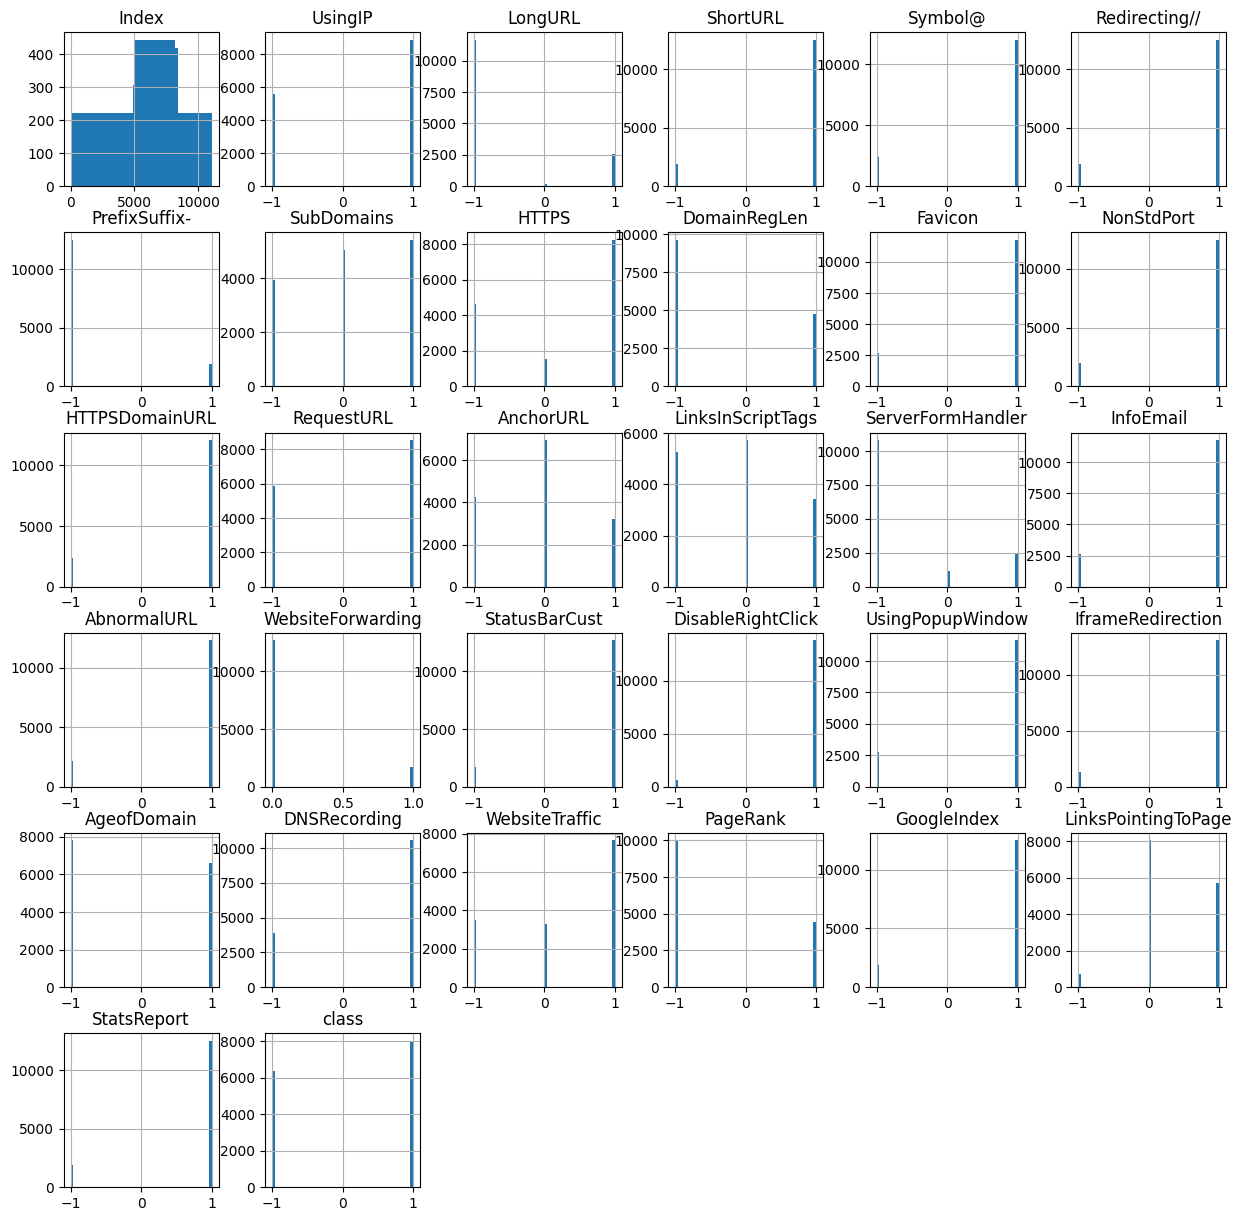

In [40]:
#Plotting the data distribution
pharming.hist(bins = 50,figsize = (15,15))
plt.show()

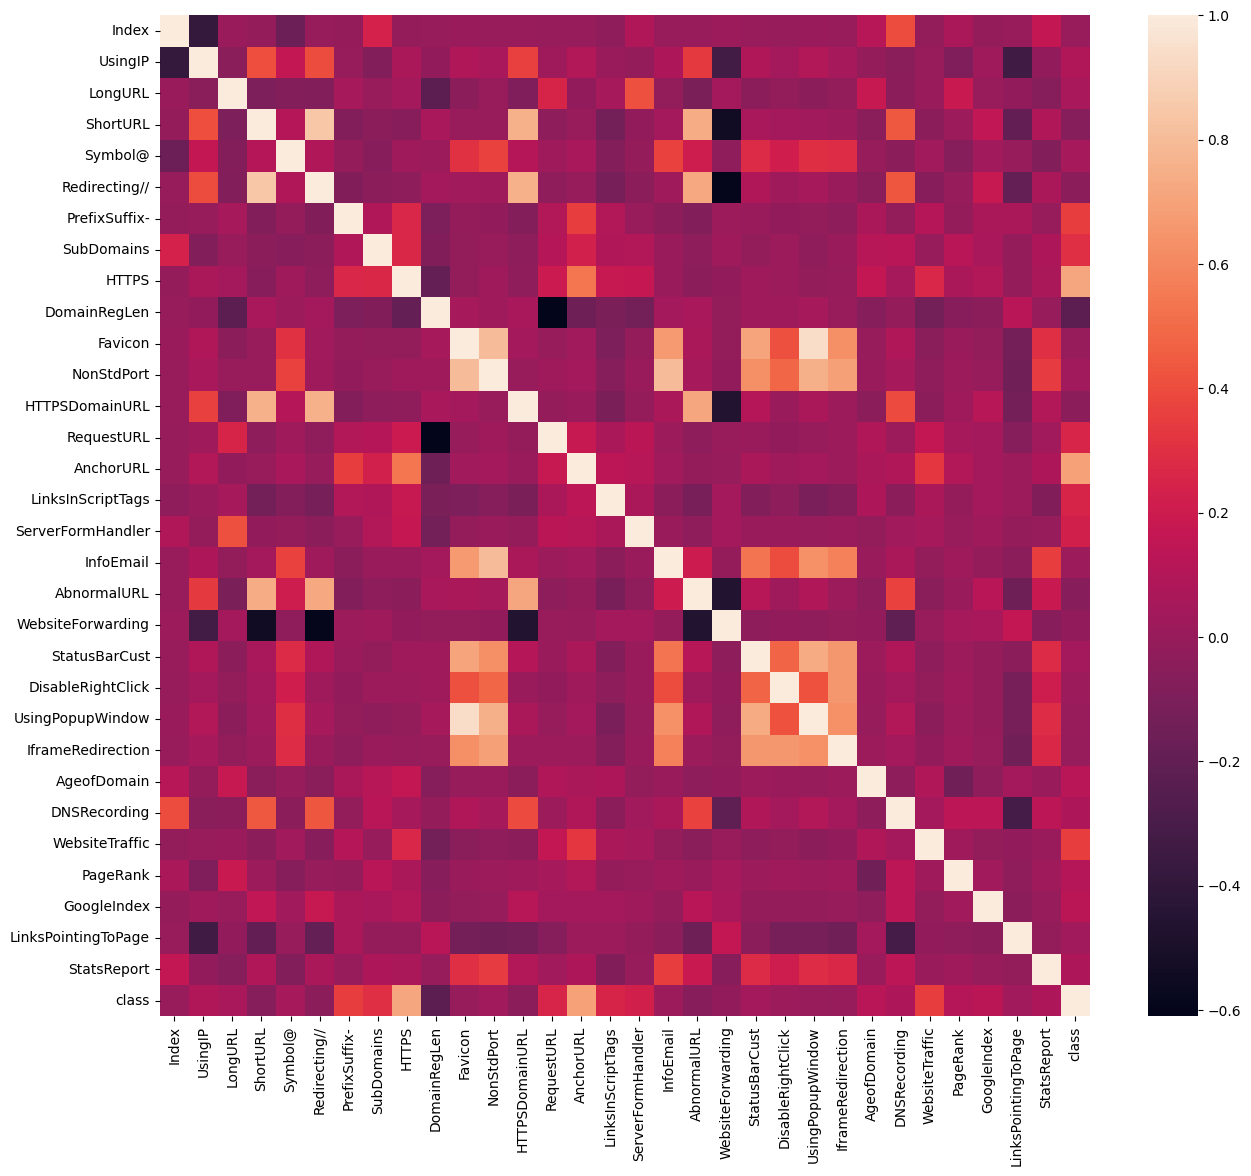

In [15]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(pharming.corr())
plt.show()

In [43]:
#Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.
pharming.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#Dropping the Domain column
domain_column = pharming.drop(['Index'], axis = 1).copy()

In [45]:
#checking the data for null or missing values
domain_column.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [46]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
domain_column = domain_column.sample(frac=1).reset_index(drop=True)
domain_column.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
1,1,-1,1,1,1,-1,-1,1,-1,1,...,-1,-1,1,1,1,1,-1,0,1,1
2,-1,-1,1,-1,1,-1,0,-1,1,1,...,1,1,-1,1,0,-1,1,0,1,-1
3,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,-1,1,1,-1
4,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1


In [49]:
# Sepratating & assigning features and target columns to X & y
y = domain_column['class']  #target variable
X = domain_column.drop('class',axis=1)   #independent variable

In [50]:
# Checking the shape for X, y variable 
X.shape, y.shape

((11054, 30), (11054,))

In [51]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test-size 20%
X_train.shape, X_test.shape

((8843, 30), (2211, 30))

In [96]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='poly', C=1000000, random_state=0)
#fit the model
svm.fit(X_train, y_train)

SVC(C=1000000, kernel='poly', random_state=0)

In [97]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [98]:
#Performance Evaluation:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy is: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy is: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy is: {:.3f}".format(acc_train_svm))

SVM: Accuracy is: 0.990
SVM: Accuracy is: 0.990
SVM: Accuracy is: 0.990


In [73]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []

#function to call for storing the results
def storeResults(model, a):
  ML_Model.append(model)
  acc_train.append(round(a, 3))

In [74]:
#Storing the results:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm)

In [75]:
#Comparision of Models
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
                         'Train Accuracy': acc_train})
results

,ML Model,Train Accuracy
0,SVM,0.99


In [76]:
#Sorting the datafram on accuracy
results.sort_values(by=['Train Accuracy'], ascending=False)

,ML Model,Train Accuracy
0,SVM,0.99


In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_svm)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 891   69]
 [  31 1220]]

True Positives(TP) =  891

True Negatives(TN) =  1220

False Positives(FP) =  69

False Negatives(FN) =  31


<AxesSubplot:>

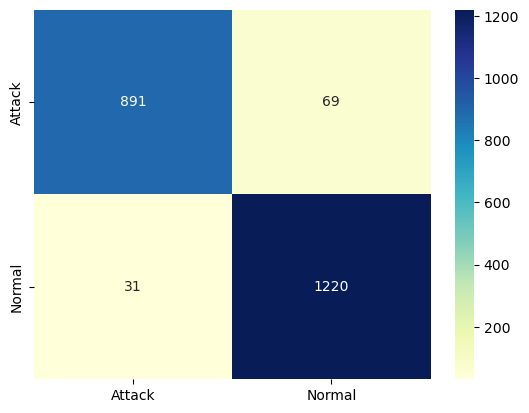

In [100]:
cm_matrix = pd.DataFrame(data=cm, columns=['Attack', 'Normal'], index=['Attack', 'Normal'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')